In [9]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [11]:
# Get the list of files matching the pattern

file_list = glob.glob("./report/Sparky/V0_0927_01/report_sparky_*.csv")
file_list.sort()

In [12]:
# Create an empty list to store DataFrames
df_list = []
# Loop through each file, read it, and append the agent_name and scenario_id columns
for file in file_list:
    # Read the CSV file
    df = pd.read_csv(file)
    df = df.drop(columns=['person_say','animal_action','animal_say'])
    
    # Extract the agent_name and scenario_id from the file name
    file_name = file.split('/')[-1]
    agent_name = file_name.split('_')[1]
    scenario_id = file_name.split('_')[2].split('.')[0]
    
    # Add the agent_name and scenario_id columns
    # df['agent_name'] = agent_name
    df['scenario_id'] = int(scenario_id)
    
    # Append the dataframe to the list
    df_list.append(df)

In [13]:
# Concatenate all the dataframes into one
df = pd.concat(df_list, ignore_index=True)

In [14]:
df

,animal_token,accuracy,practicality,scenario_id
0,608,9,8,1
1,670,8,7,1
2,733,8,9,1
3,790,9,9,1
4,618,8,7,10
...,...,...,...,...
68,626,7,8,8
69,689,9,9,8
70,765,10,10,8
71,622,10,9,9


In [15]:
df = df.groupby('scenario_id').sum().reset_index()
df = df.sort_values(by=['scenario_id'])

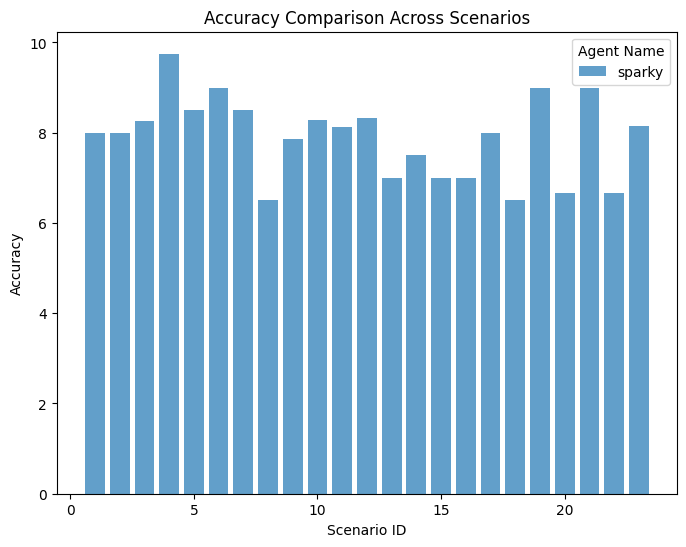

In [7]:

# 2. Bar chart for Accuracy
plt.figure(figsize=(8, 6))
plt.bar(df['scenario_id'], df['accuracy'], label='sparky', alpha=0.7)
plt.title("Accuracy Comparison Across Scenarios")
plt.xlabel("Scenario ID")
plt.ylabel("Accuracy")
plt.legend(title="Agent Name")
plt.show()

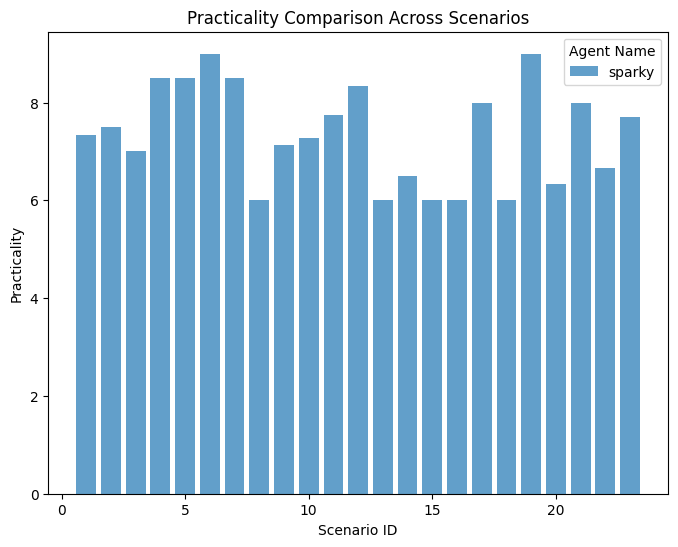

In [8]:
# 2. Bar chart for Practicality
plt.figure(figsize=(8, 6))
plt.bar(df['scenario_id'], df['practicality'], label='sparky', alpha=0.7)
plt.title("Practicality Comparison Across Scenarios")
plt.xlabel("Scenario ID")
plt.ylabel("Practicality")
plt.legend(title="Agent Name")
plt.show()


In [7]:
df.animal_token.sum()

57353

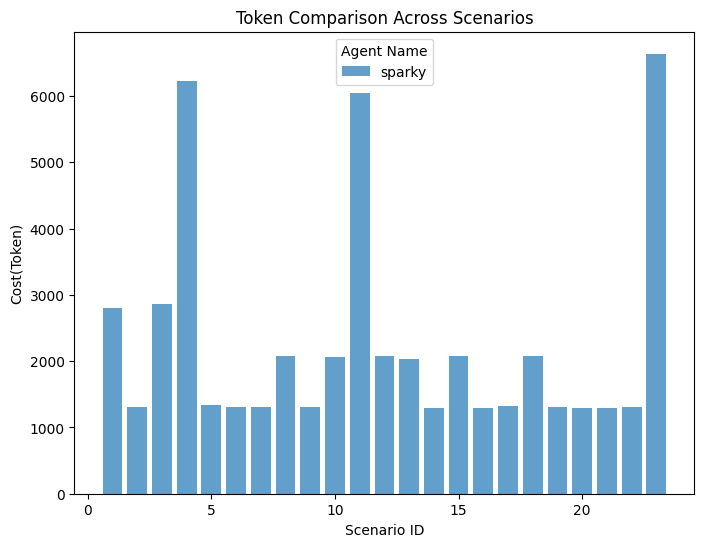

In [16]:
# 2. Bar chart for Practicality
plt.figure(figsize=(8, 6))
plt.bar(df['scenario_id'], df['animal_token'], label='sparky', alpha=0.7)
plt.title("Token Comparison Across Scenarios")
plt.xlabel("Scenario ID")
plt.ylabel("Cost(Token)")
plt.legend(title="Agent Name")
plt.show()